In [1]:
import word2vec

In [23]:
# Setup - train model 
word2vec.word2vec('example/data/text8', 'example/data/text8.bin', size=500, binary=True, verbose=True)

Running command: word2vec -train example/data/text8 -output example/data/text8.bin -size 500 -window 5 -sample 1e-3 -hs 0 -negative 5 -threads 12 -iter 5 -min-count 5 -alpha 0.025 -debug 2 -binary 1 -cbow 1
Starting training using file example/data/text8
Vocab size: 71291
Words in train file: 16718843
Alpha: 0.000002  Progress: 100.03%  Words/thread/sec: 200.97k  0%  Words/thread/sec: 195.08k  ords/thread/sec: 178.63k  read/sec: 193.69k  c: 202.59k  k  .26k  .024673  Progress: 1.32%  Words/thread/sec: 196.16k   195.62k  : 0.024620  Progress: 1.53%  Words/thread/sec: 201.60k  569  Progress: 1.74%  Words/thread/sec: 196.81k  d/sec: 202.63k  rogress: 1.94%  Words/thread/sec: 200.43k  ogress: 2.02%  Words/thread/sec: 197.01k  s: 2.14%  Words/thread/sec: 201.78k  /sec: 197.38k  5%  Words/thread/sec: 199.48k  2.46%  Words/thread/sec: 197.76k  rds/thread/sec: 202.05k  read/sec: 200.85k  ress: 2.74%  Words/thread/sec: 201.98k  hread/sec: 201.49k  4279  Progress: 2.90%  Words/thread/sec: 202.80

In [24]:
model = word2vec.load('example/data/text8.bin')

In [25]:
import csv

with open('analogies.csv') as csvfile:
    reader = csv.DictReader(csvfile, fieldnames=['0', '1', '2', '3'])
    for row in reader:
        try:
            indexes, metrics = model.analogy(pos=[row['0'], row['2']], neg=[row['1']])
            if (model.vocab[indexes].__contains__(row['3'])):
                print("Correct answer is " + row['3'] + ". Model guessed correctly.")
            else:
                print("Correct answer is " + row['3'] + ". Model guessed " + model.vocab[indexes][0])
        except:
             print("Correct answer is " + row['3'] + ". Model did not recognize a word in analogy.")

Correct answer is dog. Model guessed jolt
Correct answer is aggressive. Model guessed communicate
Correct answer is silky. Model did not recognize a word in analogy.
Correct answer is yucky. Model did not recognize a word in analogy.
Correct answer is creepy. Model did not recognize a word in analogy.
Correct answer is white. Model guessed correctly.
Correct answer is ugly. Model guessed lovely
Correct answer is closed. Model guessed correctly.
Correct answer is hate. Model guessed passion
Correct answer is dog. Model guessed dyed
Correct answer is school. Model guessed deer
Correct answer is toe. Model guessed flank
Correct answer is tree. Model guessed coastal
Correct answer is cut. Model guessed corrugated
Correct answer is sleep. Model guessed clothes
Correct answer is glove. Model guessed pull
Correct answer is copier. Model guessed copies
Correct answer is act. Model guessed novelist
Correct answer is count. Model guessed apprenticeship
Correct answer is diver. Model guessed lift

In [1]:
import pandas as pd

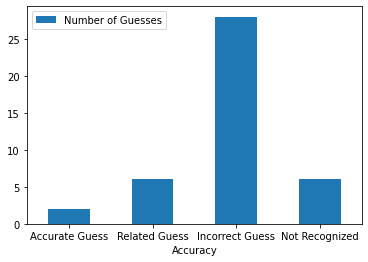

In [7]:
df = pd.DataFrame({'Accuracy':['Accurate Guess', 'Related Guess', 'Incorrect Guess', 'Not Recognized'], 'Number of Guesses':[2, 6, 28, 6]})
ax = df.plot.bar(x='Accuracy', y='Number of Guesses', rot=0)